In [26]:
# gmaps and googlemaps are 2 different lbraries 
# gmaps = https://github.com/pbugnion/gmaps
# googlemaps = https://github.com/googlemaps/google-maps-services-python
import gmaps
import gmaps.datasets
import gmaps.directions
import googlemaps.distance_matrix 
import time
from IPython import display
from IPython.display import Image
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import os

# start with  : 
# jupyter nbextension enable --py gmaps
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

In [2]:
path = os.getcwd()

In [3]:
api_key = ""

In [4]:
google_maps = googlemaps.Client(key=api_key)
gmaps.configure(api_key=api_key)  # proje adi :MyProject

In [5]:
def frange(start,stop, step=1.0):
    while start < stop:
        yield start
        start +=step

In [6]:
def create_grid_boundary(points , stepsize = 0.0015): # approximately the block size)
    list_of_points = []
    
    lons_vect = np.array([x[0] for x in points])
    lats_vect = np.array([y[1] for y in points])
    
    lonmin = min(lons_vect)
    lonmax = max(lons_vect)
    latmin = min(lats_vect)
    latmax = max(lats_vect)
    
    
    polygon = Polygon(points) # create polygon
    for x in frange(lonmin, lonmax, stepsize):
        for y in frange(latmin,latmax, stepsize):
            point = Point(x,y) # create point
            if(polygon.contains(point)):
                list_of_points.append((x,y))
    print(len(list_of_points))
    return list_of_points

In [7]:
# Points have to be in order, like top left, top right, botright, bottom right.
# No crossing the region in consecutive points

points = {}
points['pac_heights'] = [
                    [37.795564,-122.4240006],\
                    [37.7941704,-122.4348963],\
                    [37.7846807,-122.4330036],\
                    [37.7858192,-122.4219139],
                    ]
points['pac_heights_step_size'] = 0.002





points['nob_hill'] = [
                    [37.7959282,-122.4217715],\
                    [37.7972973,-122.412094],\
                    [37.7919313,-122.4109791],\
                    [37.7905756,-122.4207343],
                  ]

points['nob_hill_step_size'] = 0.002





points['portrero_and_mission_bay'] = [
                                        [37.77593, -122.39018],\
                                        [37.77604, -122.38718],\
                                        [37.75449, -122.38554],\
                                        [37.75449, -122.39121],\
                                        [37.76024, -122.39185],\
                                        [37.75951, -122.40387],\
                                        [37.76979, -122.4043],\
                                        [37.77013, -122.39683],           
                                    ]

points['portrero_and_mission_bay_step_size'] = 0.004





points['soma_small'] = [
                                        [37.7838, -122.40752],\
                                        [37.79418, -122.39464],\
                                        [37.78882, -122.38821],\
                                        [37.78123, -122.38881],\
                                        [37.77549, -122.39683],      
                                    ]
points['soma_small_step_size'] = 0.004




points['soma_large'] = [
                                        [37.77183, -122.40095],\
                                        [37.78048, -122.41207],\
                                        [37.79418, -122.39464],\
                                        [37.78882, -122.38821],\
                                        [37.78123, -122.38881],      
                                    ]
points['soma_large_step_size'] = 0.004



points['soma_and_portrero_and_mission_bay'] = [
                                        [37.77183, -122.40095],\
                                        [37.78048, -122.41207],\
                                        [37.79418, -122.39464],\
                                        [37.78882, -122.38821],\
                                        [37.78123, -122.38881],\
                                        [37.77604, -122.38718],\
                                        [37.75449, -122.38554],\
                                        [37.75449, -122.39121],\
                                        [37.76024, -122.39185],\
                                        [37.75951, -122.40387],\
                                        [37.76979, -122.4043],         
                                    ]
points['soma_and_portrero_and_mission_bay_step_size'] = 0.006


keys = ['pac_heights', 'nob_hill','portrero_and_mission_bay'\
        ,'soma_small','soma_large','soma_and_portrero_and_mission_bay']


In [8]:
grids = {}
for key in keys:
    grids[key] = create_grid_boundary(points[key], stepsize = points[key+'_step_size'])

26
12
13
12
17
17


In [9]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

portrero_and_mission_reloaded = np.load(path+"/Data/portrero_and_mission_bay_traffic_distances.npy").item()

# restore np.load for future normal usage
np.load = np_load_old

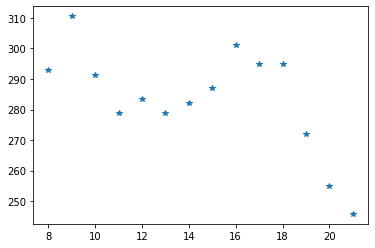

In [10]:
traffic_times_avg = []
hours = [x for x in range(8,22)]
for hour in hours:
    d = portrero_and_mission_reloaded['Wednesday'][hour]
    traffic_times =  []
    for key in d:
        traffic_times.append(d[key]['time']['value'])
        #print(d[key]['time']['value'])
    if(len(traffic_times)>0):
        traffic_times_avg.append(sum(traffic_times)/float(len(traffic_times)))
    
plt.plot(hours[0:len(traffic_times_avg)],traffic_times_avg,'*')
plt.show()

In [11]:
def generate_key(first_point,second_point):
    return str(first_point[0]) + "_" +\
              str(first_point[1]) + ":" +\
              str(second_point[0]) + "_" +\
              str(second_point[1])

In [12]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

portrero_and_mission_distances_no_time = np.load(path+"/Data/portrero_and_mission_bay_traffic_distances.npy").item()

# restore np.load for future normal usage
np.load = np_load_old


###  Generate Demand
    1) Simple demand, the probability of receiving an order in a minute is p 

In [13]:
def draw(p):
    ran = np.random.uniform()
    if(ran<p):
        return 1
    return 0 

In [14]:
def aggreagate(times, draws, interval):
    aggregated_draws = []
    aggregated_times = []
    i =0 
    while i < len(times):
        aggregated_draws.append(sum(draws[i:i+interval]))
        aggregated_times.append(times[i])
        i+=interval
    return [aggregated_times, aggregated_draws]

In [15]:
def get_day_times(num_hours=12):
    morning = datetime.now().replace(hour=8, minute=0, second=0, microsecond=0)
    this_time = morning
    times = []
    for i in range(60*num_hours):
        this_time += timedelta(minutes=1)
        times.append(this_time)
    return times

In [16]:
def uniform_day(times, p):
    draws = []
    for i  in times:
        draws.append(draw(p))
    return draws

1.3055555555555556
94


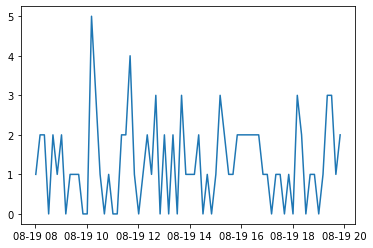

In [17]:
%matplotlib inline
times = get_day_times()
draws = uniform_day(times, 0.1)
[agg_times , agg_draws] = aggreagate(times,draws,10)
display.display(plt.plot(agg_times,agg_draws))
print(sum(agg_draws)/float(len(agg_draws)))
print(sum(agg_draws))
#plt.show()

In [18]:
def triangular_day(times, peak):
    increment = peak/float(len(times)/2)
    p = 0
    draws = []
    for i in range(len(times)):
        if(i<len(times)/2):
            p += increment
        else: 
            p -= increment
        draws.append(draw(p))
    return draws

5.416666666666667
65


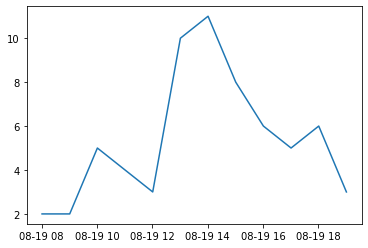

In [19]:
# %matplotlib inline
times = get_day_times()
draws = triangular_day(times, 0.21)
[agg_times , agg_draws] = aggreagate(times,draws,60)
display.display(plt.plot(agg_times,agg_draws))
print(sum(agg_draws)/float(len(agg_draws)))
print(sum(agg_draws))
#plt.show()

### Add Truck to the demand simulation

In [20]:
def log(time_now, message):
    print("Time : " + str(time_now) + "  " + message)

In [21]:
def sec_to_nearest_min(sec):
    return int(round(sec/float(60)))

In [22]:
def generate_order(grid, generation_time):
    x_noise_param = (grid[0][0] - grid[1][0])/100
    y_noise_param = (grid[0][1] - grid[1][1])/100
    
    index = randint(0, len(grid)-1)
    demand_point = grid[index]
    x_noise = randint(-20, 20)* x_noise_param
    y_noise = randint(-20, 20)* y_noise_param
    demand_point_to_plot = (demand_point[0] + x_noise , demand_point[1] + y_noise)
    
    #timestamp = (generation_time - datetime(1970, 1, 1)).total_seconds()
    return {'demand_point' : demand_point,\
            'demand_point_to_plot': demand_point_to_plot,\
            'generation_time' : generation_time}

In [23]:
class Truck:
    def __init__(self, day_of_week, fixed_hour, starting_location, distance_matrix, cust_serve_time):
        self.fixed_hour = fixed_hour
        self.day_of_week = day_of_week
        self.location = starting_location
        self.order_dict = {}
        self.distance_matrix  = distance_matrix
        self.cust_serve_time = cust_serve_time
        self.order_id = 1
        self.next_order_id = -1
        self.order_queue_display = [] 
        self.queue_log = []
        self.fullfillment_times = {}
        
    def add_order(self, order, time):
        #log(times , "Adding order to the queue " + str(order))
        self.order_dict[self.order_id] = order
        self.order_queue_display = [order['demand_point_to_plot'] for order in self.order_dict.values()]
        self.update_order_to_serve(time)
        self.order_id += 1
        
    def update_state(self,time): 
        #log(time, "Queue length: " + str(len(self.order_queue_display)) )
        self.queue_log.append(len(self.order_queue_display))
        if(not self.is_order_served(time)): return
        self.remove_served_order(time)
        self.update_order_to_serve(time)
        
    def is_order_served(self,time):
        if(self.next_order_id == -1):
            return False
        return time > self.order_dict[self.next_order_id]['serving_start_time']\
                + timedelta(minutes=self.order_dict[self.next_order_id]['traffic_time'])\
                + timedelta(minutes=self.cust_serve_time)
        
    def remove_served_order(self,time):
        self.fullfillment_times[self.next_order_id] = time - self.order_dict[self.next_order_id]['generation_time']
        self.location  = self.order_dict[self.next_order_id]['demand_point']
        del self.order_dict[self.next_order_id]
        vals = self.order_dict.values()
        if(len(vals) == 0 ): self.order_queue_display = []
        else : self.order_queue_display = [order['demand_point_to_plot'] for order in self.order_dict.values()]
        log(time, "order is served : " + str(self.next_order_id))
        self.next_order_id = -1
        
    def update_order_to_serve(self,time):
        if(self.next_order_id != -1):
            return
        if(len(self.order_queue_display) == 0) :
            self.next_order_id = -1
            return
        self.next_order_id = list(self.order_dict.keys())[0]
        demand_point = self.order_dict[self.next_order_id]['demand_point']
        key = generate_key(self.location, demand_point)
        time_key = time.hour if self.fixed_hour == -1  else self.fixed_hour
        distance_time_info  = self.distance_matrix[self.day_of_week][time_key][key] # Here
        self.order_dict[self.next_order_id]['traffic_time'] = sec_to_nearest_min(distance_time_info['time']['value'])
        
        self.order_dict[self.next_order_id]['serving_start_time'] = time
        log(time, "Serving Oder Number: " + str(self.next_order_id) )
        #sorted(self.order_dict, key=lambda (k,v): (v['generation_time'],k))[0]
        

In [24]:
def run_simulation(grid, distance_mat, draw_prob , should_plot = False, observe_time = 1, fixed_hour = -1,\
                  cust_serve_time = 2):
    times = get_day_times(8)
    draws = triangular_day(times, draw_prob)
    
    index = randint(0, len(grid)-1)
    truck_location = grid[index]
    
    truck = Truck("Wednesday", fixed_hour, truck_location, distance_mat,cust_serve_time)


    order_queue_display = []

    update_map_every = 2
    iterat = 0
    
    order_dict = {}
    for i in range(len(times)):
        fig = gmaps.figure(center=truck.location, zoom_level=15)
        truck.update_state(times[i])
        #print(times[i])
        #if(len(order_queue) > 0 ): print(len(order_queue))
        if(draws[i] == 1 ): # generate a run, randomly from the grid
            order = generate_order(grid, times[i])
            truck.add_order(order,times[i])

        if(should_plot and (iterat % update_map_every == 0)):
            if(len(truck.order_queue_display) > 0 ):
                order_layer = gmaps.marker_layer(truck.order_queue_display)
                fig.add_layer(order_layer)
            truck_layer = gmaps.heatmap_layer([truck.location])
            fig.add_layer(truck_layer)
            display.clear_output(wait=True)
            display.display(fig)
            time.sleep(observe_time)
        iterat += 1
    return [truck.queue_log, truck.fullfillment_times]

In [25]:
[queue_log_live,fullfillment_times_live] =\
run_simulation(grids['portrero_and_mission_bay'], portrero_and_mission_distances_no_time ,0.21, should_plot=False, observe_time= 2.5)

Time : 2019-08-19 08:34:00  Serving Oder Number: 1
Time : 2019-08-19 08:43:00  order is served : 1
Time : 2019-08-19 09:13:00  Serving Oder Number: 2
Time : 2019-08-19 09:18:00  order is served : 2
Time : 2019-08-19 09:22:00  Serving Oder Number: 3
Time : 2019-08-19 09:31:00  order is served : 3
Time : 2019-08-19 09:31:00  Serving Oder Number: 4
Time : 2019-08-19 09:42:00  order is served : 4
Time : 2019-08-19 09:42:00  Serving Oder Number: 5
Time : 2019-08-19 09:51:00  order is served : 5
Time : 2019-08-19 09:51:00  Serving Oder Number: 6
Time : 2019-08-19 09:58:00  order is served : 6
Time : 2019-08-19 09:58:00  Serving Oder Number: 7
Time : 2019-08-19 10:04:00  order is served : 7
Time : 2019-08-19 10:04:00  Serving Oder Number: 8
Time : 2019-08-19 10:12:00  order is served : 8
Time : 2019-08-19 10:12:00  Serving Oder Number: 9
Time : 2019-08-19 10:18:00  order is served : 9
Time : 2019-08-19 10:18:00  Serving Oder Number: 10
Time : 2019-08-19 10:28:00  order is served : 10
Time : 2

In [28]:
[queue_log_fixed_12,fullfillment_times_fixed_12] =\
run_simulation(grids['pac_heights'], nob_hill_distances_no_time, False, 2.5, 12)

12
Time : 2018-06-02 08:16:00  Serving Oder Number: 1
Time : 2018-06-02 08:20:00  order is served : 1
12
Time : 2018-06-02 08:54:00  Serving Oder Number: 2
Time : 2018-06-02 08:58:00  order is served : 2
12
Time : 2018-06-02 10:13:00  Serving Oder Number: 3
Time : 2018-06-02 10:16:00  order is served : 3
12
Time : 2018-06-02 11:24:00  Serving Oder Number: 4
Time : 2018-06-02 11:27:00  order is served : 4
12
Time : 2018-06-02 11:27:00  Serving Oder Number: 5
Time : 2018-06-02 11:30:00  order is served : 5
12
Time : 2018-06-02 11:36:00  Serving Oder Number: 6
Time : 2018-06-02 11:37:00  order is served : 6
12
Time : 2018-06-02 11:47:00  Serving Oder Number: 7
Time : 2018-06-02 11:49:00  order is served : 7
12
Time : 2018-06-02 11:58:00  Serving Oder Number: 8
Time : 2018-06-02 12:00:00  order is served : 8
12
Time : 2018-06-02 12:06:00  Serving Oder Number: 9
Time : 2018-06-02 12:09:00  order is served : 9
12
Time : 2018-06-02 12:12:00  Serving Oder Number: 10
Time : 2018-06-02 12:15:00 

In [25]:
[queue_log_fixed_9,fullfillment_times_fixed_9] =\
run_simulation(grids['pac_heights'], nob_hill_distances_no_time, False, 2.5, 9)

Time : 2018-06-02 09:26:00  Serving Oder Number: 1
Time : 2018-06-02 09:29:00  order is served : 1
Time : 2018-06-02 09:29:00  Serving Oder Number: 2
Time : 2018-06-02 09:34:00  order is served : 2
Time : 2018-06-02 10:00:00  Serving Oder Number: 3
Time : 2018-06-02 10:04:00  order is served : 3
Time : 2018-06-02 10:22:00  Serving Oder Number: 4
Time : 2018-06-02 10:27:00  order is served : 4
Time : 2018-06-02 11:04:00  Serving Oder Number: 5
Time : 2018-06-02 11:08:00  order is served : 5
Time : 2018-06-02 11:08:00  Serving Oder Number: 6
Time : 2018-06-02 11:10:00  order is served : 6
Time : 2018-06-02 11:13:00  Serving Oder Number: 7
Time : 2018-06-02 11:17:00  order is served : 7
Time : 2018-06-02 11:20:00  Serving Oder Number: 8
Time : 2018-06-02 11:23:00  order is served : 8
Time : 2018-06-02 11:52:00  Serving Oder Number: 9
Time : 2018-06-02 11:57:00  order is served : 9
Time : 2018-06-02 12:04:00  Serving Oder Number: 10
Time : 2018-06-02 12:07:00  order is served : 10
Time : 2

In [35]:
delivery_times_s = []
queue_log_lives = [] 
for prob in frange(0.11, 0.4, 0.01):
    [queue_log_live,fullfillment_times_live] =\
    run_simulation(grids['portrero_and_mission_bay'], portrero_and_mission_distances_no_time, prob, False, 2.5)
    delivery_times = [x.total_seconds()/float(60) for x in fullfillment_times_live.values()]
    delivery_times_s.append(delivery_times)
    queue_log_lives.append(queue_log_live)


Time : 2018-07-01 09:04:00  Serving Oder Number: 1
Time : 2018-07-01 09:13:00  order is served : 1
Time : 2018-07-01 09:28:00  Serving Oder Number: 2
Time : 2018-07-01 09:31:00  order is served : 2
Time : 2018-07-01 09:31:00  Serving Oder Number: 3
Time : 2018-07-01 09:41:00  order is served : 3
Time : 2018-07-01 09:41:00  Serving Oder Number: 4
Time : 2018-07-01 09:51:00  order is served : 4
Time : 2018-07-01 09:51:00  Serving Oder Number: 5
Time : 2018-07-01 09:57:00  order is served : 5
Time : 2018-07-01 10:12:00  Serving Oder Number: 6
Time : 2018-07-01 10:21:00  order is served : 6
Time : 2018-07-01 10:21:00  Serving Oder Number: 7
Time : 2018-07-01 10:31:00  order is served : 7
Time : 2018-07-01 10:36:00  Serving Oder Number: 8
Time : 2018-07-01 10:44:00  order is served : 8
Time : 2018-07-01 11:06:00  Serving Oder Number: 9
Time : 2018-07-01 11:14:00  order is served : 9
Time : 2018-07-01 11:14:00  Serving Oder Number: 10
Time : 2018-07-01 11:17:00  order is served : 10
Time : 2

Time : 2018-07-01 13:06:00  Serving Oder Number: 17
Time : 2018-07-01 13:12:00  order is served : 17
Time : 2018-07-01 13:12:00  Serving Oder Number: 18
Time : 2018-07-01 13:22:00  order is served : 18
Time : 2018-07-01 13:24:00  Serving Oder Number: 19
Time : 2018-07-01 13:32:00  order is served : 19
Time : 2018-07-01 14:46:00  Serving Oder Number: 20
Time : 2018-07-01 14:56:00  order is served : 20
Time : 2018-07-01 09:50:00  Serving Oder Number: 1
Time : 2018-07-01 09:55:00  order is served : 1
Time : 2018-07-01 10:18:00  Serving Oder Number: 2
Time : 2018-07-01 10:22:00  order is served : 2
Time : 2018-07-01 10:32:00  Serving Oder Number: 3
Time : 2018-07-01 10:41:00  order is served : 3
Time : 2018-07-01 10:52:00  Serving Oder Number: 4
Time : 2018-07-01 10:58:00  order is served : 4
Time : 2018-07-01 11:00:00  Serving Oder Number: 5
Time : 2018-07-01 11:08:00  order is served : 5
Time : 2018-07-01 11:08:00  Serving Oder Number: 6
Time : 2018-07-01 11:13:00  order is served : 6
Ti

Time : 2018-07-01 13:04:00  order is served : 20
Time : 2018-07-01 13:04:00  Serving Oder Number: 21
Time : 2018-07-01 13:15:00  order is served : 21
Time : 2018-07-01 13:15:00  Serving Oder Number: 22
Time : 2018-07-01 13:23:00  order is served : 22
Time : 2018-07-01 13:23:00  Serving Oder Number: 23
Time : 2018-07-01 13:35:00  order is served : 23
Time : 2018-07-01 13:35:00  Serving Oder Number: 24
Time : 2018-07-01 13:44:00  order is served : 24
Time : 2018-07-01 13:44:00  Serving Oder Number: 25
Time : 2018-07-01 13:52:00  order is served : 25
Time : 2018-07-01 13:52:00  Serving Oder Number: 26
Time : 2018-07-01 14:02:00  order is served : 26
Time : 2018-07-01 14:02:00  Serving Oder Number: 27
Time : 2018-07-01 14:11:00  order is served : 27
Time : 2018-07-01 14:11:00  Serving Oder Number: 28
Time : 2018-07-01 14:18:00  order is served : 28
Time : 2018-07-01 14:18:00  Serving Oder Number: 29
Time : 2018-07-01 14:27:00  order is served : 29
Time : 2018-07-01 14:30:00  Serving Oder N

Time : 2018-07-01 12:52:00  order is served : 22
Time : 2018-07-01 12:52:00  Serving Oder Number: 23
Time : 2018-07-01 13:01:00  order is served : 23
Time : 2018-07-01 13:01:00  Serving Oder Number: 24
Time : 2018-07-01 13:13:00  order is served : 24
Time : 2018-07-01 13:13:00  Serving Oder Number: 25
Time : 2018-07-01 13:21:00  order is served : 25
Time : 2018-07-01 13:21:00  Serving Oder Number: 26
Time : 2018-07-01 13:29:00  order is served : 26
Time : 2018-07-01 13:29:00  Serving Oder Number: 27
Time : 2018-07-01 13:38:00  order is served : 27
Time : 2018-07-01 13:38:00  Serving Oder Number: 28
Time : 2018-07-01 13:44:00  order is served : 28
Time : 2018-07-01 13:44:00  Serving Oder Number: 29
Time : 2018-07-01 13:53:00  order is served : 29
Time : 2018-07-01 13:53:00  Serving Oder Number: 32
Time : 2018-07-01 14:00:00  order is served : 32
Time : 2018-07-01 14:00:00  Serving Oder Number: 33
Time : 2018-07-01 14:06:00  order is served : 33
Time : 2018-07-01 14:06:00  Serving Oder N

Time : 2018-07-01 12:17:00  order is served : 20
Time : 2018-07-01 12:17:00  Serving Oder Number: 21
Time : 2018-07-01 12:30:00  order is served : 21
Time : 2018-07-01 12:30:00  Serving Oder Number: 22
Time : 2018-07-01 12:36:00  order is served : 22
Time : 2018-07-01 12:36:00  Serving Oder Number: 23
Time : 2018-07-01 12:47:00  order is served : 23
Time : 2018-07-01 12:47:00  Serving Oder Number: 24
Time : 2018-07-01 12:53:00  order is served : 24
Time : 2018-07-01 12:53:00  Serving Oder Number: 25
Time : 2018-07-01 12:57:00  order is served : 25
Time : 2018-07-01 12:57:00  Serving Oder Number: 26
Time : 2018-07-01 13:07:00  order is served : 26
Time : 2018-07-01 13:07:00  Serving Oder Number: 27
Time : 2018-07-01 13:16:00  order is served : 27
Time : 2018-07-01 13:16:00  Serving Oder Number: 28
Time : 2018-07-01 13:24:00  order is served : 28
Time : 2018-07-01 13:24:00  Serving Oder Number: 29
Time : 2018-07-01 13:34:00  order is served : 29
Time : 2018-07-01 13:46:00  Serving Oder N

Time : 2018-07-01 11:33:00  order is served : 17
Time : 2018-07-01 11:33:00  Serving Oder Number: 18
Time : 2018-07-01 11:42:00  order is served : 18
Time : 2018-07-01 11:42:00  Serving Oder Number: 19
Time : 2018-07-01 11:48:00  order is served : 19
Time : 2018-07-01 11:48:00  Serving Oder Number: 20
Time : 2018-07-01 11:57:00  order is served : 20
Time : 2018-07-01 11:57:00  Serving Oder Number: 21
Time : 2018-07-01 12:07:00  order is served : 21
Time : 2018-07-01 12:07:00  Serving Oder Number: 22
Time : 2018-07-01 12:15:00  order is served : 22
Time : 2018-07-01 12:15:00  Serving Oder Number: 23
Time : 2018-07-01 12:25:00  order is served : 23
Time : 2018-07-01 12:25:00  Serving Oder Number: 24
Time : 2018-07-01 12:33:00  order is served : 24
Time : 2018-07-01 12:33:00  Serving Oder Number: 32
Time : 2018-07-01 12:36:00  order is served : 32
Time : 2018-07-01 12:36:00  Serving Oder Number: 25
Time : 2018-07-01 12:39:00  order is served : 25
Time : 2018-07-01 12:39:00  Serving Oder N

Time : 2018-07-01 15:42:00  order is served : 48
Time : 2018-07-01 15:42:00  Serving Oder Number: 49
Time : 2018-07-01 15:48:00  order is served : 49
Time : 2018-07-01 15:48:00  Serving Oder Number: 50
Time : 2018-07-01 15:55:00  order is served : 50
Time : 2018-07-01 15:55:00  Serving Oder Number: 51
Time : 2018-07-01 09:01:00  Serving Oder Number: 1
Time : 2018-07-01 09:07:00  order is served : 1
Time : 2018-07-01 09:19:00  Serving Oder Number: 2
Time : 2018-07-01 09:26:00  order is served : 2
Time : 2018-07-01 09:37:00  Serving Oder Number: 3
Time : 2018-07-01 09:45:00  order is served : 3
Time : 2018-07-01 09:45:00  Serving Oder Number: 4
Time : 2018-07-01 09:52:00  order is served : 4
Time : 2018-07-01 09:52:00  Serving Oder Number: 5
Time : 2018-07-01 09:59:00  order is served : 5
Time : 2018-07-01 09:59:00  Serving Oder Number: 6
Time : 2018-07-01 10:10:00  order is served : 6
Time : 2018-07-01 10:10:00  Serving Oder Number: 7
Time : 2018-07-01 10:17:00  order is served : 7
Time

Time : 2018-07-01 12:24:00  order is served : 34
Time : 2018-07-01 12:24:00  Serving Oder Number: 24
Time : 2018-07-01 12:30:00  order is served : 24
Time : 2018-07-01 12:30:00  Serving Oder Number: 25
Time : 2018-07-01 12:39:00  order is served : 25
Time : 2018-07-01 12:39:00  Serving Oder Number: 26
Time : 2018-07-01 12:47:00  order is served : 26
Time : 2018-07-01 12:47:00  Serving Oder Number: 27
Time : 2018-07-01 12:56:00  order is served : 27
Time : 2018-07-01 12:56:00  Serving Oder Number: 28
Time : 2018-07-01 13:03:00  order is served : 28
Time : 2018-07-01 13:03:00  Serving Oder Number: 29
Time : 2018-07-01 13:08:00  order is served : 29
Time : 2018-07-01 13:08:00  Serving Oder Number: 30
Time : 2018-07-01 13:18:00  order is served : 30
Time : 2018-07-01 13:18:00  Serving Oder Number: 31
Time : 2018-07-01 13:29:00  order is served : 31
Time : 2018-07-01 13:29:00  Serving Oder Number: 35
Time : 2018-07-01 13:32:00  order is served : 35
Time : 2018-07-01 13:32:00  Serving Oder N

Time : 2018-07-01 09:10:00  Serving Oder Number: 4
Time : 2018-07-01 09:18:00  order is served : 4
Time : 2018-07-01 09:18:00  Serving Oder Number: 5
Time : 2018-07-01 09:27:00  order is served : 5
Time : 2018-07-01 09:30:00  Serving Oder Number: 6
Time : 2018-07-01 09:34:00  order is served : 6
Time : 2018-07-01 09:39:00  Serving Oder Number: 7
Time : 2018-07-01 09:43:00  order is served : 7
Time : 2018-07-01 09:43:00  Serving Oder Number: 8
Time : 2018-07-01 09:55:00  order is served : 8
Time : 2018-07-01 10:05:00  Serving Oder Number: 9
Time : 2018-07-01 10:08:00  order is served : 9
Time : 2018-07-01 10:11:00  Serving Oder Number: 10
Time : 2018-07-01 10:17:00  order is served : 10
Time : 2018-07-01 10:17:00  Serving Oder Number: 11
Time : 2018-07-01 10:26:00  order is served : 11
Time : 2018-07-01 10:26:00  Serving Oder Number: 12
Time : 2018-07-01 10:35:00  order is served : 12
Time : 2018-07-01 10:35:00  Serving Oder Number: 13
Time : 2018-07-01 10:45:00  order is served : 13
Ti

Time : 2018-07-01 13:57:00  order is served : 36
Time : 2018-07-01 13:57:00  Serving Oder Number: 37
Time : 2018-07-01 14:07:00  order is served : 37
Time : 2018-07-01 14:07:00  Serving Oder Number: 38
Time : 2018-07-01 14:12:00  order is served : 38
Time : 2018-07-01 14:12:00  Serving Oder Number: 39
Time : 2018-07-01 14:17:00  order is served : 39
Time : 2018-07-01 14:17:00  Serving Oder Number: 40
Time : 2018-07-01 14:24:00  order is served : 40
Time : 2018-07-01 14:24:00  Serving Oder Number: 41
Time : 2018-07-01 14:29:00  order is served : 41
Time : 2018-07-01 14:29:00  Serving Oder Number: 42
Time : 2018-07-01 14:34:00  order is served : 42
Time : 2018-07-01 14:34:00  Serving Oder Number: 43
Time : 2018-07-01 14:44:00  order is served : 43
Time : 2018-07-01 14:44:00  Serving Oder Number: 44
Time : 2018-07-01 14:53:00  order is served : 44
Time : 2018-07-01 14:53:00  Serving Oder Number: 45
Time : 2018-07-01 15:04:00  order is served : 45
Time : 2018-07-01 15:04:00  Serving Oder N

Time : 2018-07-01 11:36:00  order is served : 16
Time : 2018-07-01 11:36:00  Serving Oder Number: 17
Time : 2018-07-01 11:46:00  order is served : 17
Time : 2018-07-01 11:46:00  Serving Oder Number: 18
Time : 2018-07-01 11:52:00  order is served : 18
Time : 2018-07-01 11:52:00  Serving Oder Number: 19
Time : 2018-07-01 12:00:00  order is served : 19
Time : 2018-07-01 12:00:00  Serving Oder Number: 20
Time : 2018-07-01 12:06:00  order is served : 20
Time : 2018-07-01 12:06:00  Serving Oder Number: 21
Time : 2018-07-01 12:15:00  order is served : 21
Time : 2018-07-01 12:15:00  Serving Oder Number: 22
Time : 2018-07-01 12:25:00  order is served : 22
Time : 2018-07-01 12:25:00  Serving Oder Number: 23
Time : 2018-07-01 12:38:00  order is served : 23
Time : 2018-07-01 12:38:00  Serving Oder Number: 24
Time : 2018-07-01 12:43:00  order is served : 24
Time : 2018-07-01 12:43:00  Serving Oder Number: 25
Time : 2018-07-01 12:51:00  order is served : 25
Time : 2018-07-01 12:51:00  Serving Oder N

Time : 2018-07-01 15:42:00  order is served : 51
Time : 2018-07-01 15:42:00  Serving Oder Number: 52
Time : 2018-07-01 15:52:00  order is served : 52
Time : 2018-07-01 15:52:00  Serving Oder Number: 53
Time : 2018-07-01 08:52:00  Serving Oder Number: 1
Time : 2018-07-01 09:02:00  order is served : 1
Time : 2018-07-01 09:04:00  Serving Oder Number: 2
Time : 2018-07-01 09:09:00  order is served : 2
Time : 2018-07-01 09:09:00  Serving Oder Number: 3
Time : 2018-07-01 09:17:00  order is served : 3
Time : 2018-07-01 09:17:00  Serving Oder Number: 4
Time : 2018-07-01 09:27:00  order is served : 4
Time : 2018-07-01 09:27:00  Serving Oder Number: 5
Time : 2018-07-01 09:39:00  order is served : 5
Time : 2018-07-01 09:39:00  Serving Oder Number: 6
Time : 2018-07-01 09:49:00  order is served : 6
Time : 2018-07-01 09:49:00  Serving Oder Number: 7
Time : 2018-07-01 09:59:00  order is served : 7
Time : 2018-07-01 09:59:00  Serving Oder Number: 8
Time : 2018-07-01 10:03:00  order is served : 8
Time :

Time : 2018-07-01 11:59:00  order is served : 24
Time : 2018-07-01 11:59:00  Serving Oder Number: 25
Time : 2018-07-01 12:07:00  order is served : 25
Time : 2018-07-01 12:07:00  Serving Oder Number: 26
Time : 2018-07-01 12:16:00  order is served : 26
Time : 2018-07-01 12:16:00  Serving Oder Number: 27
Time : 2018-07-01 12:21:00  order is served : 27
Time : 2018-07-01 12:21:00  Serving Oder Number: 28
Time : 2018-07-01 12:26:00  order is served : 28
Time : 2018-07-01 12:26:00  Serving Oder Number: 29
Time : 2018-07-01 12:29:00  order is served : 29
Time : 2018-07-01 12:29:00  Serving Oder Number: 30
Time : 2018-07-01 12:35:00  order is served : 30
Time : 2018-07-01 12:35:00  Serving Oder Number: 31
Time : 2018-07-01 12:43:00  order is served : 31
Time : 2018-07-01 12:43:00  Serving Oder Number: 32
Time : 2018-07-01 12:50:00  order is served : 32
Time : 2018-07-01 12:50:00  Serving Oder Number: 33
Time : 2018-07-01 12:57:00  order is served : 33
Time : 2018-07-01 12:57:00  Serving Oder N

Time : 2018-07-01 14:42:00  order is served : 46
Time : 2018-07-01 14:42:00  Serving Oder Number: 47
Time : 2018-07-01 14:52:00  order is served : 47
Time : 2018-07-01 14:52:00  Serving Oder Number: 64
Time : 2018-07-01 15:00:00  order is served : 64
Time : 2018-07-01 15:00:00  Serving Oder Number: 65
Time : 2018-07-01 15:09:00  order is served : 65
Time : 2018-07-01 15:09:00  Serving Oder Number: 48
Time : 2018-07-01 15:19:00  order is served : 48
Time : 2018-07-01 15:19:00  Serving Oder Number: 66
Time : 2018-07-01 15:27:00  order is served : 66
Time : 2018-07-01 15:27:00  Serving Oder Number: 67
Time : 2018-07-01 15:33:00  order is served : 67
Time : 2018-07-01 15:33:00  Serving Oder Number: 49
Time : 2018-07-01 15:36:00  order is served : 49
Time : 2018-07-01 15:36:00  Serving Oder Number: 50
Time : 2018-07-01 15:45:00  order is served : 50
Time : 2018-07-01 15:45:00  Serving Oder Number: 51
Time : 2018-07-01 15:56:00  order is served : 51
Time : 2018-07-01 15:56:00  Serving Oder N

Time : 2018-07-01 11:01:00  order is served : 19
Time : 2018-07-01 11:01:00  Serving Oder Number: 20
Time : 2018-07-01 11:06:00  order is served : 20
Time : 2018-07-01 11:06:00  Serving Oder Number: 21
Time : 2018-07-01 11:14:00  order is served : 21
Time : 2018-07-01 11:14:00  Serving Oder Number: 22
Time : 2018-07-01 11:22:00  order is served : 22
Time : 2018-07-01 11:22:00  Serving Oder Number: 23
Time : 2018-07-01 11:35:00  order is served : 23
Time : 2018-07-01 11:35:00  Serving Oder Number: 24
Time : 2018-07-01 11:41:00  order is served : 24
Time : 2018-07-01 11:41:00  Serving Oder Number: 25
Time : 2018-07-01 11:44:00  order is served : 25
Time : 2018-07-01 11:44:00  Serving Oder Number: 26
Time : 2018-07-01 11:50:00  order is served : 26
Time : 2018-07-01 11:50:00  Serving Oder Number: 27
Time : 2018-07-01 11:56:00  order is served : 27
Time : 2018-07-01 11:56:00  Serving Oder Number: 28
Time : 2018-07-01 12:03:00  order is served : 28
Time : 2018-07-01 12:03:00  Serving Oder N

Time : 2018-07-01 13:27:00  order is served : 39
Time : 2018-07-01 13:27:00  Serving Oder Number: 40
Time : 2018-07-01 13:37:00  order is served : 40
Time : 2018-07-01 13:37:00  Serving Oder Number: 41
Time : 2018-07-01 13:45:00  order is served : 41
Time : 2018-07-01 13:45:00  Serving Oder Number: 42
Time : 2018-07-01 13:53:00  order is served : 42
Time : 2018-07-01 13:53:00  Serving Oder Number: 43
Time : 2018-07-01 14:01:00  order is served : 43
Time : 2018-07-01 14:01:00  Serving Oder Number: 44
Time : 2018-07-01 14:10:00  order is served : 44
Time : 2018-07-01 14:10:00  Serving Oder Number: 45
Time : 2018-07-01 14:14:00  order is served : 45
Time : 2018-07-01 14:14:00  Serving Oder Number: 46
Time : 2018-07-01 14:24:00  order is served : 46
Time : 2018-07-01 14:24:00  Serving Oder Number: 47
Time : 2018-07-01 14:32:00  order is served : 47
Time : 2018-07-01 14:32:00  Serving Oder Number: 48
Time : 2018-07-01 14:36:00  order is served : 48
Time : 2018-07-01 14:36:00  Serving Oder N

Time : 2018-07-01 10:11:00  order is served : 10
Time : 2018-07-01 10:11:00  Serving Oder Number: 11
Time : 2018-07-01 10:21:00  order is served : 11
Time : 2018-07-01 10:21:00  Serving Oder Number: 12
Time : 2018-07-01 10:27:00  order is served : 12
Time : 2018-07-01 10:27:00  Serving Oder Number: 13
Time : 2018-07-01 10:37:00  order is served : 13
Time : 2018-07-01 10:37:00  Serving Oder Number: 14
Time : 2018-07-01 10:49:00  order is served : 14
Time : 2018-07-01 10:49:00  Serving Oder Number: 15
Time : 2018-07-01 10:56:00  order is served : 15
Time : 2018-07-01 10:56:00  Serving Oder Number: 16
Time : 2018-07-01 11:04:00  order is served : 16
Time : 2018-07-01 11:04:00  Serving Oder Number: 17
Time : 2018-07-01 11:11:00  order is served : 17
Time : 2018-07-01 11:11:00  Serving Oder Number: 18
Time : 2018-07-01 11:15:00  order is served : 18
Time : 2018-07-01 11:15:00  Serving Oder Number: 19
Time : 2018-07-01 11:24:00  order is served : 19
Time : 2018-07-01 11:24:00  Serving Oder N

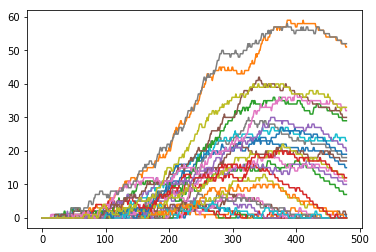

In [39]:
for i in queue_log_lives:
    plt.plot(i)
plt.show()

In [40]:
 def plotPercs(percs,p):
    x = []
    y = []
    for i in percs:
        x.append(i['len'])
        y.append(i[p])
    plt.plot(x,y,'*')
    plt.show()

Percentile : 20


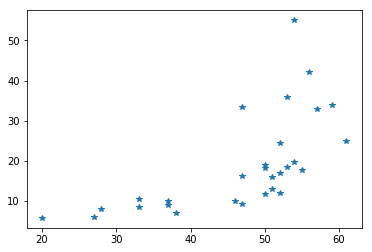

Percentile : 30


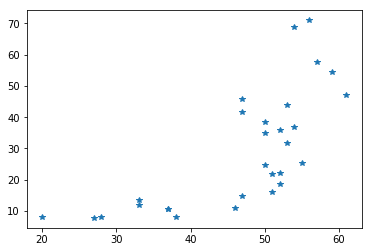

Percentile : 40


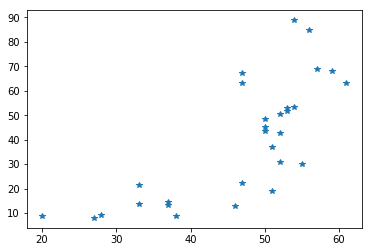

Percentile : 50


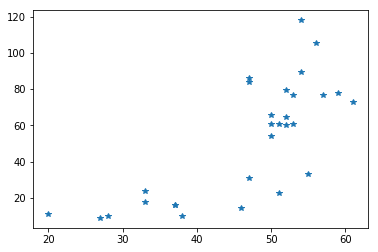

Percentile : 60


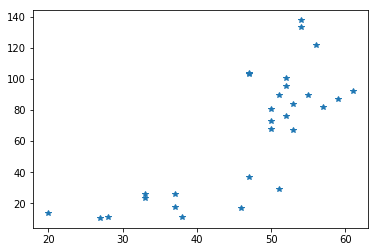

Percentile : 70


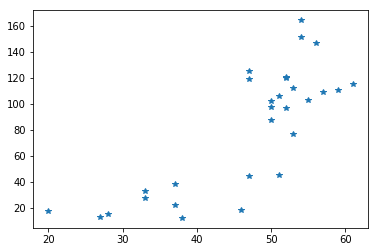

Percentile : 80


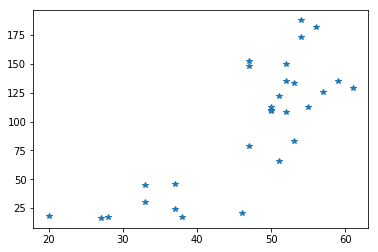

Percentile : 90


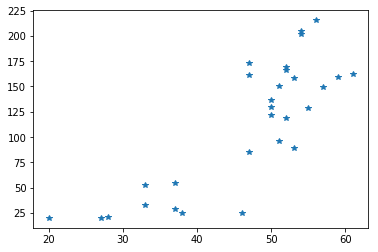

Percentile : 100


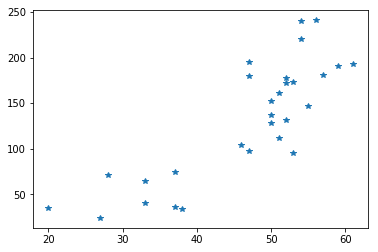

In [41]:
import copy

percs = []
#print(delivery_times_s)
for delivery_times in delivery_times_s:
    perc = {}
    for i in range(0,101,5):
        a = np.percentile(delivery_times,i)
        perc[i] = a
    perc['len'] = len(delivery_times)
    percs.append(copy.deepcopy(perc))
for i in range(20,101,10):
    print("Percentile : " +  str(i))
    plotPercs(percs,i)


45
0 : 5.0
5 : 6.2
10 : 11.000000000000002
15 : 20.0
20 : 27.6
25 : 31.0
30 : 34.39999999999999
35 : 43.4
40 : 50.0
45 : 61.20000000000001
50 : 77.0
55 : 81.2
60 : 87.6
65 : 94.6
70 : 107.99999999999997
75 : 122.0
80 : 128.8
85 : 132.8
90 : 135.0
95 : 135.8


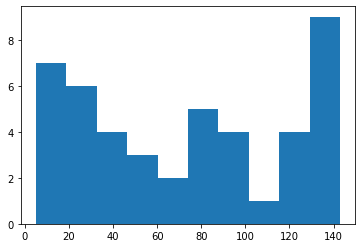

<Figure size 432x288 with 0 Axes>

In [42]:
delivery_times = [x.total_seconds()/float(60) for x in fullfillment_times_live.values()]
plt.hist(delivery_times)
print(len(delivery_times))


perc = {}
for i in range(0,100,5):
    a = np.percentile(delivery_times,i)
    perc[i] = a
    
for key in sorted(perc): print(str(key) + " : " + str(perc[key]) )

plt.figure()
#plt.plot(times,queue_log_live)
plt.show()